# Loading Dataset 

In [24]:

from google.colab import files
files.upload()

Saving zoo.data to zoo (1).data


{'zoo.data': b'aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1\nantelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\nbass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\nbear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1\nboar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1\nbuffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\ncalf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1\ncarp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4\ncatfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\ncavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1\ncheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1\nchicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2\nchub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\nclam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7\ncrab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7\ncrayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7\ncrow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2\ndeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\ndogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4\ndolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1\ndove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2\nduck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2\nelephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\nflamingo,0,1,1,0,1,0,0,0,1,1,0,

In [25]:
from google.colab import files
files.upload()

Saving zoo.names to zoo (1).names


{'zoo.names': b'1. Title: Zoo database\n\n2. Source Information\n   -- Creator: Richard Forsyth\n   -- Donor: Richard S. Forsyth \n             8 Grosvenor Avenue\n             Mapperley Park\n             Nottingham NG3 5DX\n             0602-621676\n   -- Date: 5/15/1990\n \n3. Past Usage:\n   -- None known other than what is shown in Forsyth\'s PC/BEAGLE User\'s Guide.\n\n4. Relevant Information:\n   -- A simple database containing 17 Boolean-valued attributes.  The "type"\n      attribute appears to be the class attribute.  Here is a breakdown of\n      which animals are in which type: (I find it unusual that there are\n      2 instances of "frog" and one of "girl"!)\n\n      Class# Set of animals:\n      ====== ===============================================================\n           1 (41) aardvark, antelope, bear, boar, buffalo, calf,\n                  cavy, cheetah, deer, dolphin, elephant,\n                  fruitbat, giraffe, girl, goat, gorilla, hamster,\n                

# Importing all the necesssary libraries

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score,classification_report,confusion_matrix,precision_recall_curve
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [0]:
# Reading data through pandas library
data = pd.read_csv("zoo.data")

In [28]:
data.head()

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
aardvark    100 non-null object
1           100 non-null int64
0           100 non-null int64
0.1         100 non-null int64
1.1         100 non-null int64
0.2         100 non-null int64
0.3         100 non-null int64
1.2         100 non-null int64
1.3         100 non-null int64
1.4         100 non-null int64
1.5         100 non-null int64
0.4         100 non-null int64
0.5         100 non-null int64
4           100 non-null int64
0.6         100 non-null int64
0.7         100 non-null int64
1.6         100 non-null int64
1.7         100 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.1+ KB


# Data Preprocessing

In [30]:
# Renaming columns of data using the "zoo.names" file
data.columns =['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type']
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [0]:

df = pd.DataFrame({"animal_name":['aardvark'],"hair":[1],"feathers":[0],"eggs":[0],"milk":[1],"airborne":[0],"aquatic":[0],"predator":[1],'toothed':[1],'backbone':[1],'breathes':[1],'venomous':[0],'fins':[0],"legs":[4],'tail':[0],'domestic':[0],'catsize':[1],'class_type':[1]})

In [32]:
train_data=df.append(data,ignore_index=True)
train_data.head()

,airborne,animal_name,aquatic,backbone,breathes,catsize,class_type,domestic,eggs,feathers,fins,hair,legs,milk,predator,tail,toothed,venomous
0,0,aardvark,0,1,1,1,1,0,0,0,0,1,4,1,1,0,1,0
1,0,antelope,0,1,1,1,1,0,0,0,0,1,4,1,0,1,1,0
2,0,bass,1,1,0,0,4,0,1,0,1,0,0,0,1,1,1,0
3,0,bear,0,1,1,1,1,0,0,0,0,1,4,1,1,0,1,0
4,0,boar,0,1,1,1,1,0,0,0,0,1,4,1,1,1,1,0


In [33]:
train_data.shape

(101, 18)

In [34]:
columnsTitles=['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type']
train_data=train_data.reindex(columns=columnsTitles)
train_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


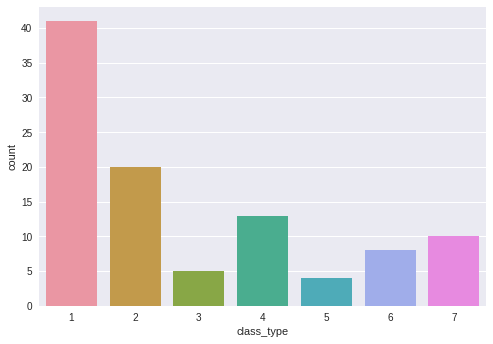

In [35]:
# plot to see class distribution
sns.countplot(train_data['class_type'],label="Count")

In [36]:
# extracting features column from the dataset
x_data = train_data.iloc[:,:-1]
x_data.head()
x_data.shape

(101, 17)

In [37]:
# extracting target class from dataset
y_data= train_data.iloc[:,-1:]
y_data.head()
y_data.shape

(101, 1)

In [38]:
# dropping the column "animal_name" since this feature is not informative
x_name = x_data['animal_name']

x_data = x_data.iloc[:,1:]

x_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [39]:

X = np.array(x_data)
y= np.array(y_data)

# Since it is a multiclass dataset , we need to use label_binarizer to transform the feature vector according to no. of classes
Y = label_binarize(y, classes=[0, 1, 2,3,4,5,6])
n_classes = Y.shape[1]
n_classes

7

# Model Fitting

## 1. SVM Model for this multiclass classification

In [40]:
# SVC with linear kernel 
scores = []
clf = OneVsRestClassifier(SVC(kernel='linear'))   # OneVsRest Classifier for multiclass classification

# Using KFold  for cross validation with n_folds = 5
cv = KFold(n_splits=5, random_state=None, shuffle=False)    
for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    y_score = clf.decision_function(X_test)
    
# Classification Acuuracy
print("Classification Accuracy:",np.mean(scores))
    
# Precision Score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
    

Classification Accuracy: 0.89
Average precision score, micro-averaged over all classes: 0.90


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:526: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.90')

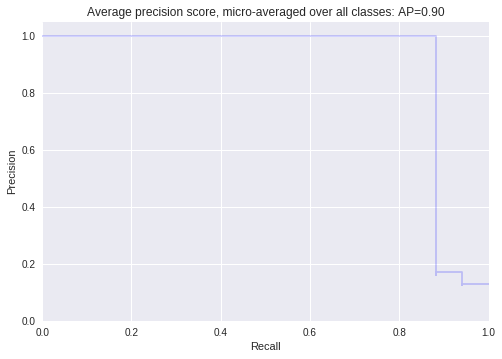

In [41]:
# plotiing to ROC curve for model performance for linear kernel of SVM
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [42]:
# SVC with rbf kernel 
scores = []
clf = OneVsRestClassifier(SVC(kernel='rbf'))
cv = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    y_score = clf.decision_function(X_test)
    
# Classification Acuuracy
print("Classification Accuracy:",np.mean(scores))
    
# Precision Score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
    

Classification Accuracy: 0.8104761904761905
Average precision score, micro-averaged over all classes: 0.87


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.87')

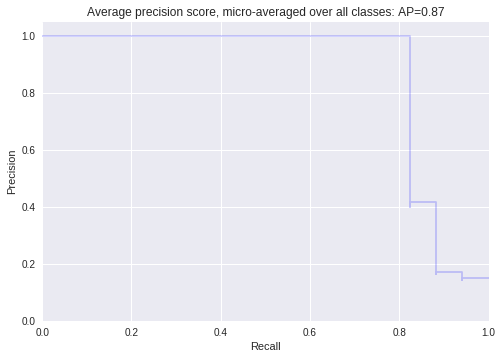

In [43]:
# plotiing to ROC curve for model performance for rbf kernel of SVM
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [44]:
# SVC with polynomial kernel 
scores = []
clf = OneVsRestClassifier(SVC(kernel='poly'))
cv = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    y_score = clf.decision_function(X_test)
    
# Classification Acuuracy
print("Classification Accuracy:",np.mean(scores))
    
# Precision Score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
    

Classification Accuracy: 0.6328571428571428
Average precision score, micro-averaged over all classes: 0.72


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.72')

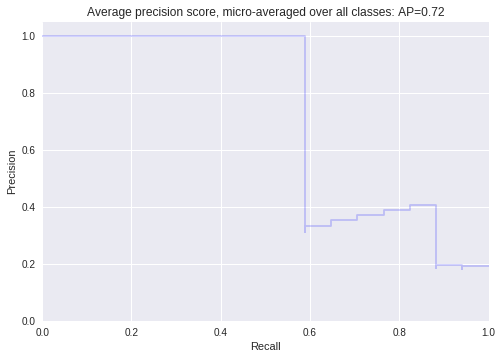

In [45]:
# plotiing to ROC curve for model performance for polynomial kernel of SVM
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [46]:
# SVC with sigmoid kernel 
scores = []
clf = OneVsRestClassifier(SVC(kernel='sigmoid'))
cv = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    y_score = clf.decision_function(X_test)
    
# Classification Acuuracy
print("Classification Accuracy:",np.mean(scores))
    
# Precision Score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
    

Classification Accuracy: 0.5238095238095238
Average precision score, micro-averaged over all classes: 0.38


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.38')

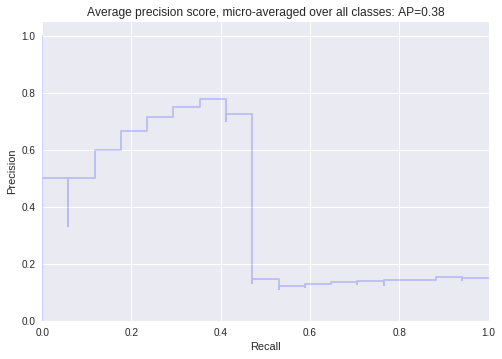

In [47]:
# plotiing to ROC curve for model performance for sigmoid kernel of SVM
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

##2.  Back Propagation Neural Network using Tensorflow Framework

In [48]:
# Train-test split cross validation
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


In [49]:
train_y.shape

(70, 1)

In [0]:
X = tf.placeholder(tf.float32, [None,16]) 
Y = tf.placeholder(tf.int32, [None, 1])

In [0]:
Y_one_hot = tf.one_hot(Y, 7)  # one hot encoding
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])


In [52]:
W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight')
b = tf.Variable(tf.random_normal([7],seed=0), name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
logits = tf.matmul(X, W) + b

In [0]:
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

In [0]:
# Training the model using Gradient Descent Algorithm 
train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [0]:
# Alternate algorithm for training - Adam Optimizer
#train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost) 

In [0]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Running the tensorflow session and getting evaluation metrics

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)
    

Step:     0	Loss: 3.402	Acc: 30.00%
Step:  1000	Loss: 0.135	Acc: 87.14%
Step:  2000	Loss: 0.076	Acc: 90.00%
Step:  3000	Loss: 0.054	Acc: 90.00%
Step:  4000	Loss: 0.043	Acc: 90.00%
Step:  5000	Loss: 0.037	Acc: 90.00%
Model Prediction = 0.9
Test Prediction = 0.9354839
